### Creating heatmaps for the our summary of the results figure
We generated a heatmap of the mean difference in response between the test condition and symmetric DMSO for each strain. This plot will go into our "results summary" figure

#### Reading in the packages and the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dat = pd.read_csv('/Users/Emily/Documents/S1F2/all_strains_mdiff_dmso.csv', index_col=0)

In [3]:
#Getting rid of columns we don't need
dat = dat.drop(['control', 'control_N', 'test_N', 'effect_size', 'bca_low', 'bca_high', 'pvalue_mann_whitney', 'statistic_mann_whitney'], axis=1)
dat.head()

,test,difference,Strain
0,(-)-Huperzine A,2.506552,PR678
1,1-octanol,-3.953032,PR678
2,"2,3-Dihydrobenzofuran",6.791056,PR678
3,"2,5-Dihydroxybenzoic acid",1.256955,PR678
4,2-Methyl-1-butanol,1.722631,PR678


In [4]:
#Creating a wide DF to pass to the plotting package
pdat = dat.pivot(index='test', columns='Strain', values='difference')
pdat = pdat.rename_axis(None)

In [5]:
cols = list(pdat.columns)
a, b, c, d = cols.index('CX10'), cols.index('N2'), cols.index('GN1077'), cols.index('PR678')
cols[b], cols[a], cols[d], cols[c] = cols[a], cols[b], cols[c], cols[d]
df = pdat[cols]
df

Strain,N2,PR678,CX10,GN1077
(-)-Huperzine A,3.377967,2.506552,0.282733,-0.434662
1-octanol,-7.446258,-3.953032,-1.173355,-0.040677
"2,3-Dihydrobenzofuran",9.194467,6.791056,9.735851,-1.424593
"2,5-Dihydroxybenzoic acid",2.462995,1.256955,-1.519682,-0.757694
2-Methyl-1-butanol,11.712247,1.722631,10.784048,-2.090040
2-nonanone,-4.575976,-6.325735,-3.744640,-2.109201
Acetophenone,5.238403,-4.155159,1.138951,-2.662677
Anisole,3.016755,6.443394,4.986971,-0.644143
Camphor,-2.756356,1.511301,1.567913,-0.214094
Carnosol,2.520538,6.715551,1.664123,-0.378642


Sorting the data in descending order

In [10]:
sortdat = df.sort_values(by='N2', ascending=False)

In [9]:
sortdat.index

Index(['Isoamyl alcohol', '2-Methyl-1-butanol', 'Thiophene',
       '2,3-Dihydrobenzofuran', 'Diacetyl', 'Phenylacetylene', 'Paeoniflorin',
       'α-Phellandrene', 'Acetophenone', 'Coumaran', 'Leonurine',
       'Guaiazulene', 'L-Mimosine', 'Solasodine', 'Isoquinoline', 'Furfural',
       '(-)-Huperzine A', 'Anisole', 'Limonin', 'Cinnamyl Alcohol',
       'Piperitenone', 'Ethyl palmitate', 'Carnosol',
       '2,5-Dihydroxybenzoic acid', 'p-Tolualdehyde', 'Lapachol',
       'Piperonyl Alcohol', 'Sabinene', 'Sinomenine hydrochloride', 'H2O',
       'Oleanolic Acid', 'Daucosterol', 'Ethyl p-methoxycinnamate',
       'Methyl palmitate', 'Ursolic acid', 'Camphor', 'Spinosad',
       'Salvinorin A Propionate', 'Ellagic acid', '2-nonanone', 'Phytol',
       '1-octanol'],
      dtype='object')

#### Creating subsets of the data based on the dependency of OSM-9 only, TAX-4 only or both TAX-4 and OSM-9 signaling

In [10]:
vchange = ['Phytol', 'Ellagic acid', 'Salvinorin A Propionate',
          'Spinosad', 'Ursolic acid', 'Methyl palmitate', 'Daucosterol',
          'Oleanolic Acid', 'Piperonyl Alcohol', 'Acetophenone']
osm9 = ['Leonurine', 'L-Mimosine', 'Solasodine']

tax4 = ['Isoamyl alcohol', '2-Methyl-1-butanol', 'Furfural', 'p-Tolualdehyde']

both = ['Thiophene', '2,3-Dihydrobenzofuran', 'Diacetyl', 'Phenylacetylene',
       'Paeoniflorin', 'α-Phellandrene', 'Coumaran', 'Isoquinoline', '(-)-Huperzine A',
       'Anisole', 'Limonin', 'Piperitenone', 'Sabinene', 'Camphor', '2-nonanone', '1-octanol']

In [11]:
p = dat.pivot(index='test', columns='Strain', values='difference').reset_index()
p = p.rename(columns = {'test':'Compound'})
p.head()

Strain,Compound,CX10,GN1077,N2,PR678
0,(-)-Huperzine A,0.282733,-0.434662,3.377967,2.506552
1,1-octanol,-1.173355,-0.040677,-7.446258,-3.953032
2,"2,3-Dihydrobenzofuran",9.735851,-1.424593,9.194467,6.791056
3,"2,5-Dihydroxybenzoic acid",-1.519682,-0.757694,2.462995,1.256955
4,2-Methyl-1-butanol,10.784048,-2.090040,11.712247,1.722631


In [93]:
vc = p.loc[p['Compound'].isin(vchange)]
o9 = p.loc[p['Compound'].isin(osm9)]
t4 = p.loc[p['Compound'].isin(tax4)]
bth = p.loc[p['Compound'].isin(both)]
subs = [vc, o9, t4, bth]

In [123]:
def phmp(stuff):
    fig, ax = plt.subplots(figsize=(15,5))
    sns.heatmap(stuff,  vmax=13, vmin=-13, center=0, cmap='vlag')
    ax.tick_params(bottom=False, left=False)
    #plt.tight_layout()
    plt.rcParams['svg.fonttype'] = 'none'
    
    plt.savefig('/Users/Emily/Documents/NP_manuscript/sub' + str(len(stuff)) + '.svg')

#### Creating a plotting function to plot all 4 ion channel signaling subsets

[None, None, None, None]

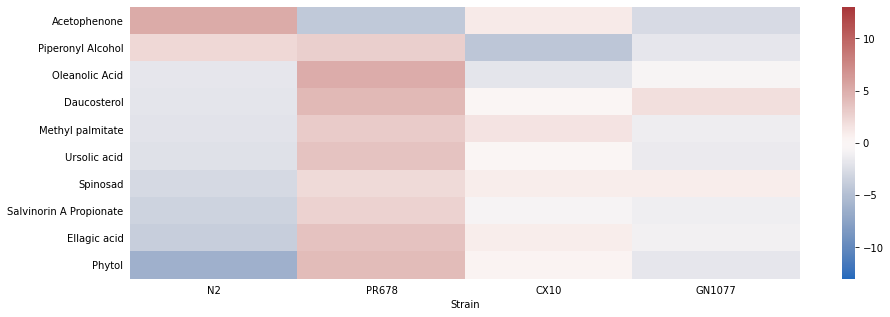

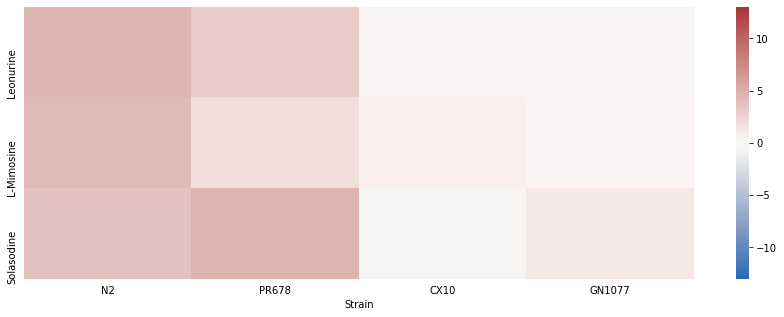

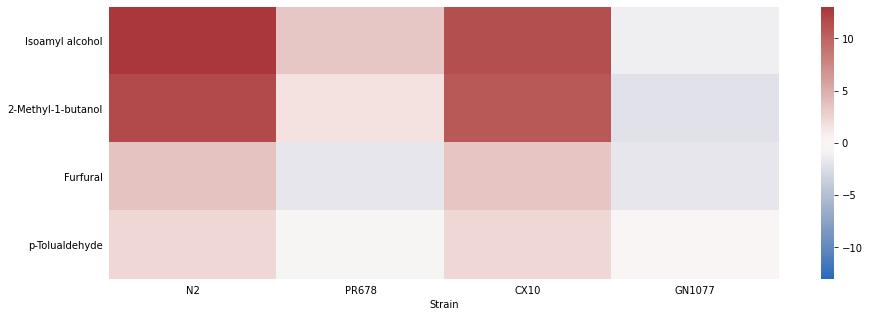

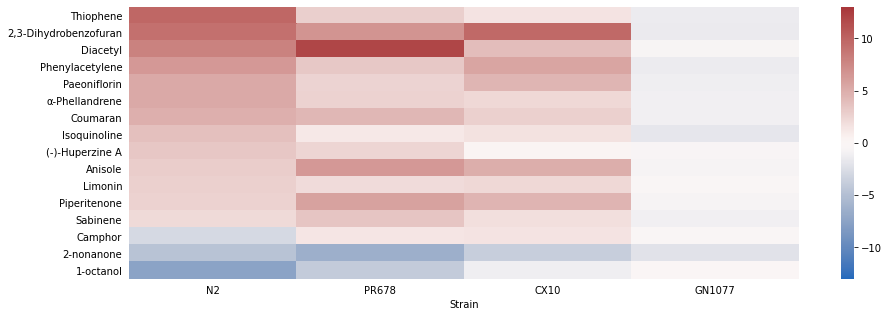

In [124]:
def new_idx(dat):
    dat = dat.set_index('Compound').rename_axis(None)
    cols = list(dat.columns)
    a, b, c, d = cols.index('CX10'), cols.index('N2'), cols.index('GN1077'), cols.index('PR678')
    cols[b], cols[a], cols[d], cols[c] = cols[a], cols[b], cols[c], cols[d]
    df = dat[cols]
    df = df.sort_values(by='N2', ascending=False)
    phmp(df)
    #return df

[new_idx(x) for x in subs]